# Hierarchical Clustering

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from __future__ import division
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
import theano
import cv2
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Peter/python-fundamentals/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Perform hierarchical clustering on observations (columns)

In [97]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
import scipy.spatial.distance as ssd
from faker import Factory

fake = Factory.create()
colorList = []

for i in range(5000):
    colorList.append(fake.hex_color())

set_link_color_palette(colorList)

df = pd.read_csv('know_your_y.csv')

df.reset_index(inplace=True, drop=True)

df['Player_ID'] = df['Player_ID'].astype(int)
y = np.array(df['OBPM 3-4-5'].values)
pid = np.array(df['Player_ID'].values)
yr = np.array(df['Yr'].values)
images = []
for i in range(len(pid)):
    images.append(cv2.imread('thumbnails/thumbnail_{0}_{1}-{2}.png'.format(str(pid[i]), str(yr[i]-1), str(yr[i])[-2:]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)

/Users/Peter/python-fundamentals/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


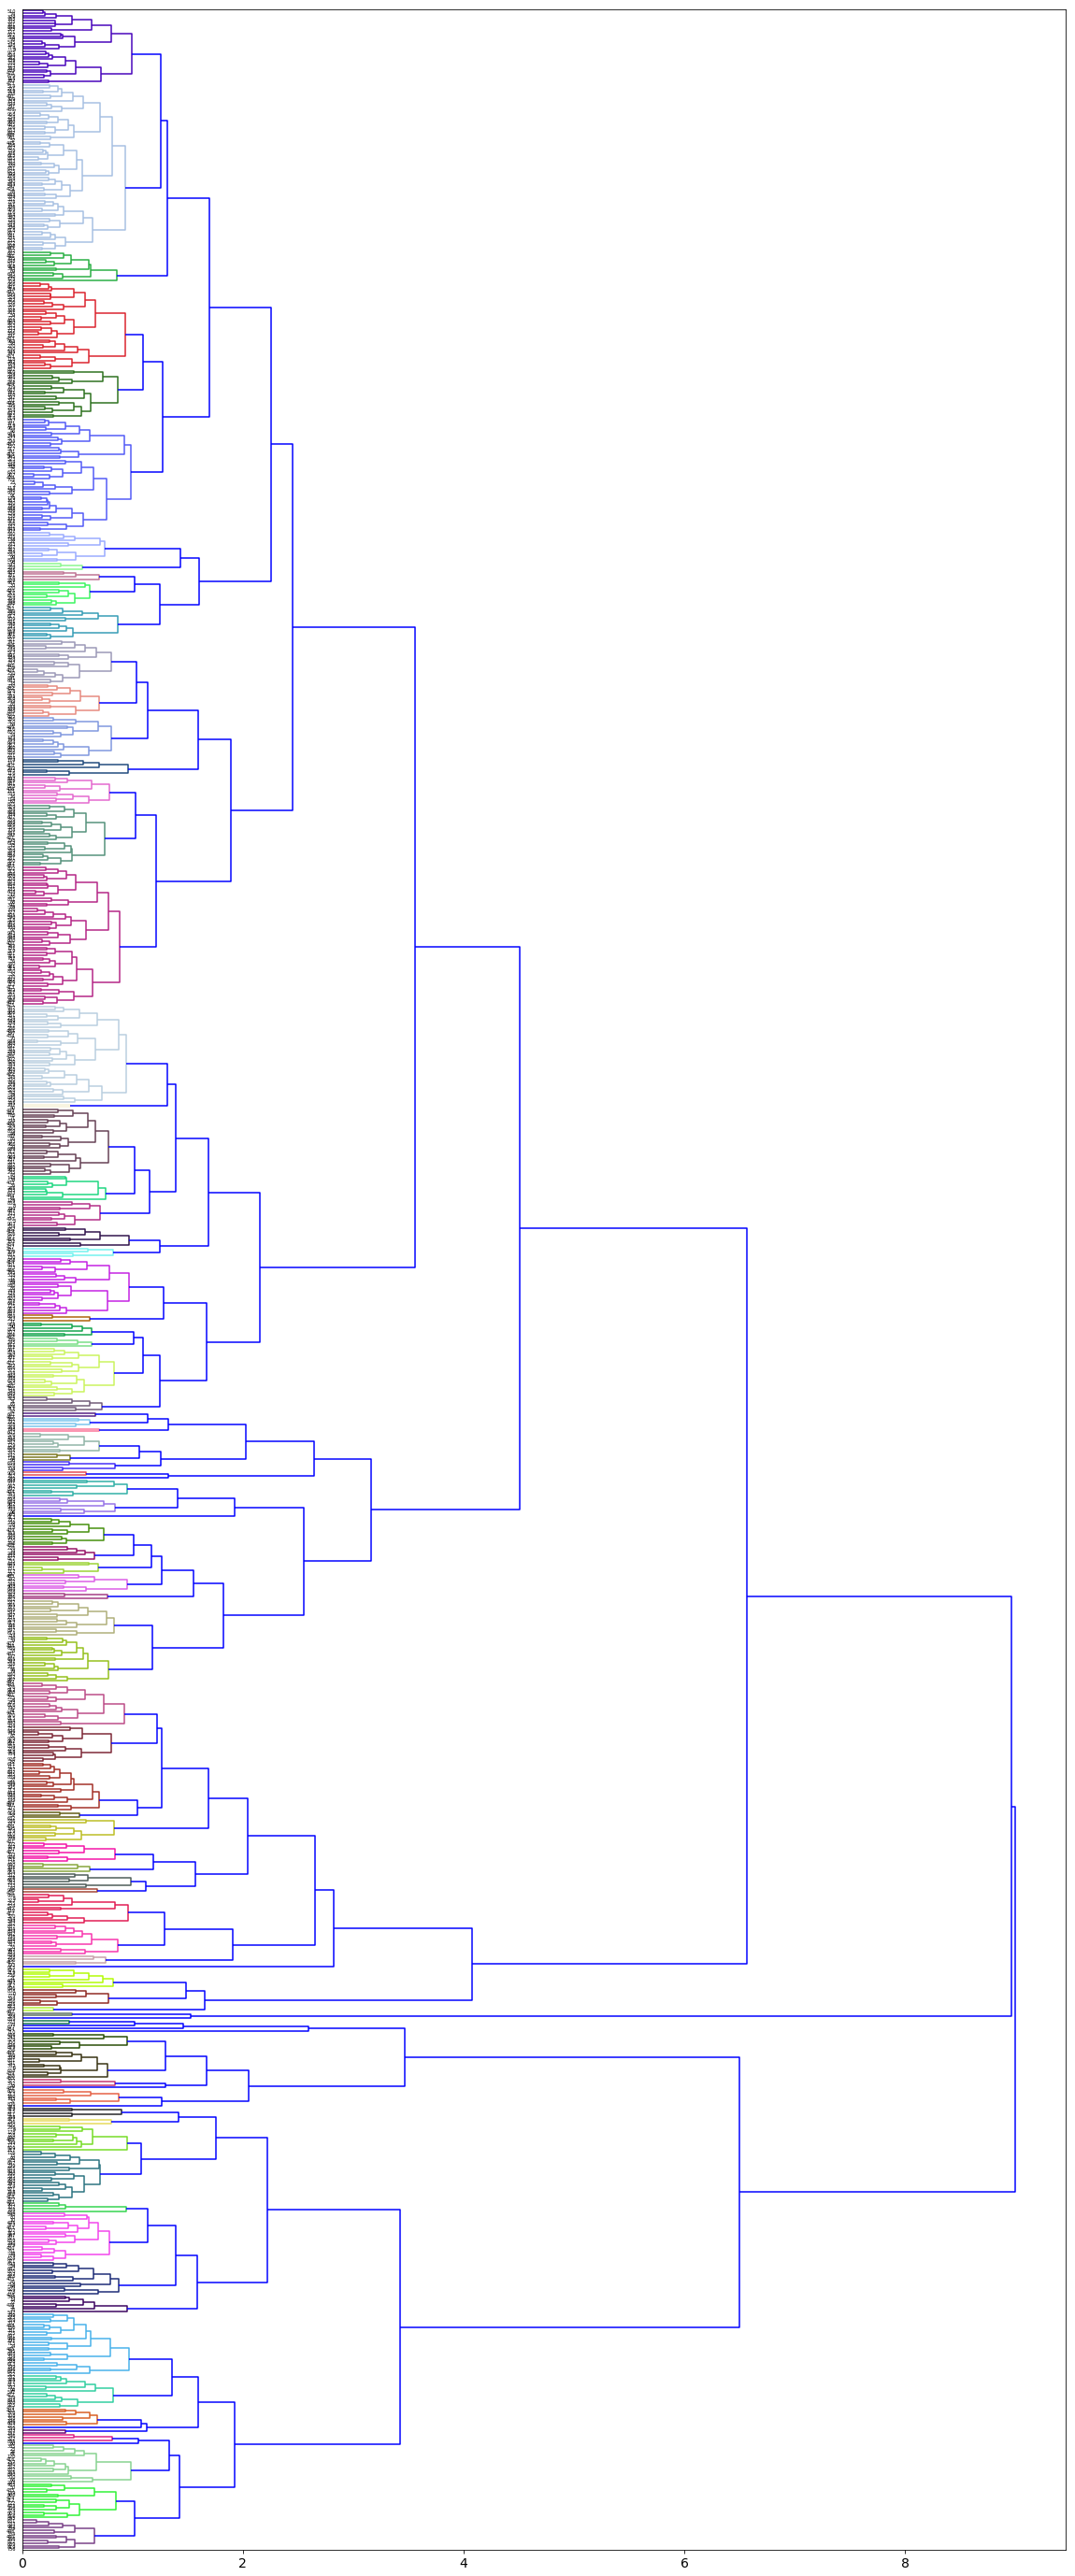

In [98]:
# Create distance matrix on columns using cosine distance
# convert the redundant n*n square matrix form into a condensed nC2 array
dist = ssd.squareform(pdist(X, 'cosine'))
clust = linkage(dist, method='complete')

fig, ax = plt.subplots(figsize=(20,50))
_ = dendrogram(clust, color_threshold=1, orientation='right', ax=ax)
_ = plt.xticks(fontsize=14)

In [99]:
R = dendrogram(clust,
                color_threshold=1, no_plot=True)

In [100]:
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

lineups = get_cluster_classes(R)

In [101]:
lineups

#784086,"['756', '819', '689', '872', '268', '460', '334', '446', '533', '651', '982', '359', '689']"
#2ff335,"['516', '904', '845', '206', '673', '374', '122', '412', '424', '900', '139', '435', '50', '955', '139']"
#87d390,"['66', '500', '293', '355', '832', '257', '416', '140', '552', '890', '23', '385', '26', '81', '120']"
#e01c82,"['322', '346', '885']"
b,"['60', '349', '383', '482', '677', '484', '710', '869', '283', '915', '913', '289', '932']"
#6a0670,"['292', '777']"
#d95f22,"['222', '609', '196', '368', '378', '407', '108']"
#30cea0,"['459', '925', '339', '472', '893', '820', '94', '192', '358', '582', '717', '813', '541']"
#46b1ea,"['622', '896', '199', '613', '522', '588', '986', '304', '688', '345', '465', '24', '715', '291', '946', '691', '725', '150', '458', '381', '307', '569', '525', '799']"
#3a035f,"['51', '476', '19', '544', '72', '76', '592']"
#1c2b76,"['778', '824', '428', '44', '218', '405', '928', '45', '227', '870', '34', '693', '682']"


In [127]:
thing = []

for ok in range(len(list(lineups.values()))):
    comps = list(lineups.values())[ok]

    for i in comps:
        thing.append([df['Player'][int(i)], df['Pos'][int(i)], df['Yr'][int(i)], df['Age'][int(i)], ok, df['OBPM'][int(i)], df['OBPM 3-4-5'][int(i)], df['AST%'][int(i)], df['AST% 3-4-5'][int(i)]])
    loadout = pd.DataFrame(thing)
    loadout.rename(columns={0:'Player', 1: 'Pos', 2: 'Year', 3: 'Age', 4: 'Cluster', 5: 'OBPM', 6:'OBPM 3-4-5', 7: 'AST%', 8:'AST% 3-4-5'},inplace=True)
    loadout = loadout.sort_values('OBPM 3-4-5', ascending=False)
    loadout.reset_index(inplace=True, drop=True)
    print(loadout)
    print('------------')

dx = pd.DataFrame(thing)
dx.rename(columns={0:'Player', 1: 'Pos', 2: 'Year', 3: 'Age', 4: 'Cluster', 5: 'OBPM', 6:'OBPM 3-4-5', 7: 'AST%', 8:'AST% 3-4-5'},inplace=True)

              Player Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0      Zach Randolph  PF  2003   21        0   0.6         0.0   5.7   
1   Rasho Nesterovic   C  2000   23        0  -2.3        -1.2   7.8   
2          Ike Diogu  PF  2006   22        0  -2.0        -1.4   4.9   
3         JJ Hickson   C  2009   20        0  -4.7        -1.7   2.1   
4     Stromile Swift  PF  2001   21        0  -3.4        -2.0   3.5   
5        John Henson  PF  2013   22        0  -2.6        -2.0   6.3   
6         Keon Clark   C  2000   24        0  -1.5        -2.3   6.2   
7         Glen Davis   C  2008   22        0  -2.7        -3.0   4.6   
8       Nenad Krstic  PF  2005   21        0  -2.1        -3.6   7.1   
9       Nenad Krstic  PF  2005   21        0  -2.1        -3.6   7.1   
10     Samaki Walker  PF  1997   20        0  -5.1        -3.7   4.9   
11    Donnell Harvey  PF  2002   21        0  -1.4        -3.9   7.2   
12   Michael Bradley  PF  2003   23        0  -2.5         NaN  

                  Player Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0            Elton Brand  PF  2000   20       15   1.3         3.3  11.8   
1          Blake Griffin  PF  2011   21        2   2.2         3.0  18.7   
2             Tim Duncan  PF  1998   21        8   1.8         2.8  13.7   
3            Steve Novak  PF  2009   25        4   1.6         2.7   5.8   
4          Carlos Boozer  PF  2003   21        1   0.3         2.7   9.3   
5         Antawn Jamison  SF  1999   22        1  -1.1         2.2   5.9   
6            Brad Miller   C  2000   23       13   0.0         2.2   7.8   
7         Antoine Walker  PF  1997   20        4  -0.7         2.1  15.3   
8      Amar'e Stoudemire  PF  2003   20       11  -1.6         2.1   5.0   
9              Pau Gasol   C  2002   21        8   0.7         1.8  13.8   
10   Shareef Abdur-Rahim  PF  1997   20        1  -0.8         1.6  12.1   
11          Earl Boykins  PG  2002   25        4  -0.4         1.4  31.5   
12        Br

[293 rows x 9 columns]
------------
                   Player Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0          Damian Lillard  PG  2013   22       33   2.7         5.7  28.8   
1         Peja Stojakovic  SF  1999   21       32   0.2         3.4  10.8   
2             Elton Brand  PF  2000   20       15   1.3         3.3  11.8   
3           Blake Griffin  PF  2011   21        2   2.2         3.0  18.7   
4              Tim Duncan  PF  1998   21        8   1.8         2.8  13.7   
5             Steve Novak  PF  2009   25        4   1.6         2.7   5.8   
6           Carlos Boozer  PF  2003   21        1   0.3         2.7   9.3   
7           Klay Thompson  SG  2012   21       35   0.9         2.5  14.2   
8        Danilo Gallinari  SF  2010   21       27   1.3         2.5   7.6   
9             Brad Miller   C  2000   23       13   0.0         2.2   7.8   
10         Antawn Jamison  SF  1999   22        1  -1.1         2.2   5.9   
11      Amar'e Stoudemire  PF  2003   20

                  Player Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0         Damian Lillard  PG  2013   22       33   2.7         5.7  28.8   
1            Dwyane Wade  PG  2004   22       38   0.9         5.2  25.1   
2             Kevin Love   C  2009   20       38  -0.7         3.9   6.8   
3        Peja Stojakovic  SF  1999   21       32   0.2         3.4  10.8   
4            Elton Brand  PF  2000   20       15   1.3         3.3  11.8   
5          Blake Griffin  PF  2011   21        2   2.2         3.0  18.7   
6           Andre Miller  PG  2000   23       38   1.8         2.8  38.7   
7             Tim Duncan  PF  1998   21        8   1.8         2.8  13.7   
8          Carlos Boozer  PF  2003   21        1   0.3         2.7   9.3   
9            Steve Novak  PF  2009   25        4   1.6         2.7   5.8   
10         Klay Thompson  SG  2012   21       35   0.9         2.5  14.2   
11      Danilo Gallinari  SF  2010   21       27   1.3         2.5   7.6   
12        Co

                    Player Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0               Chris Paul  PG  2006   20       61   4.7         8.0  38.2   
1             LeBron James  SG  2004   19       64   2.2         7.4  27.8   
2             Vince Carter  SF  1999   22       59   2.1         5.9  17.2   
3           Damian Lillard  PG  2013   22       33   2.7         5.7  28.8   
4          Stephon Marbury  PG  1997   19       68   2.0         5.4  38.1   
5                Ray Allen  SG  1997   21       67   1.6         5.4  13.9   
6              Dwyane Wade  PG  2004   22       38   0.9         5.2  25.1   
7             Derrick Rose  PG  2009   20       56   0.9         5.1  28.8   
8            Manu Ginobili  SG  2003   25       67   1.1         4.9  15.8   
9             Jimmy Butler  SF  2013   23       63   0.9         4.6   8.6   
10             Baron Davis  PG  2000   20       68  -1.1         4.5  32.6   
11            Kevin Durant  SG  2008   19       69  -0.6        

                 Player Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0            Chris Paul  PG  2006   20       61   4.7         8.0  38.2   
1          LeBron James  SG  2004   19       64   2.2         7.4  27.8   
2         Stephen Curry  PG  2010   21       81   1.8         6.6  24.6   
3          Vince Carter  SF  1999   22       59   2.1         5.9  17.2   
4          James Harden  SG  2010   20       80   0.7         5.7  12.3   
5        Damian Lillard  PG  2013   22       33   2.7         5.7  28.8   
6       Stephon Marbury  PG  1997   19       68   2.0         5.4  38.1   
7             Ray Allen  SG  1997   21       67   1.6         5.4  13.9   
8           Dwyane Wade  PG  2004   22       38   0.9         5.2  25.1   
9        Gilbert Arenas  PG  2002   20       83   2.3         5.2  24.8   
10         Derrick Rose  PG  2009   20       56   0.9         5.1  28.8   
11        Manu Ginobili  SG  2003   25       67   1.1         4.9  15.8   
12        Isaiah Thomas  

In [183]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

dgenx = dx[dx['OBPM 3-4-5'] >= -20]
# dgenx = dgenx[dgenx['Pos'] != 'C']
# dgenx = dgenx[dgenx['Pos'] != 'PF']
# dgenx = dgenx[dgenx['Pos'] != 'PF-C']
# dgenx = dgenx[dgenx['Pos'] != 'C-PF']
# dgenx = dgenx[dgenx['Pos'] != 'PF-SF']
# dgenx = dgenx[dgenx['Pos'] != 'SF-PF']
dgenx.reset_index(inplace=True, drop=True)

X = np.array(dgenx[['AST%', 'OBPM', 'Age', 'Cluster']].values)
y = np.array(dgenx['AST% 3-4-5'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)
regr = RandomForestRegressor(random_state=21, n_estimators=1000)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

In [184]:
regr.score(X_test, y_test)

0.37166730044007601